In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [9]:
print(os.listdir('/kaggle/input/digit-recognizer/'))
path_train = '/kaggle/input/digit-recognizer/train.csv'
path_test = '/kaggle/input/digit-recognizer/test.csv'

['sample_submission.csv', 'train.csv', 'test.csv']


In [11]:
data = pd.read_csv(path_train)
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
data.shape

(42000, 785)

In [61]:
print(f"total nan values in the dataset are = {data.isna().sum().sum()}")

total nan values in the dataset are = 0


In [54]:
# plot and image randomly
rand_int = np.random.randint(0, (data.shape[0] - 1))
rand_image = data.iloc[rand_int][1:]
rand_image = rand_image.to_numpy()
rand_image = rand_image.reshape(28, 28)

5


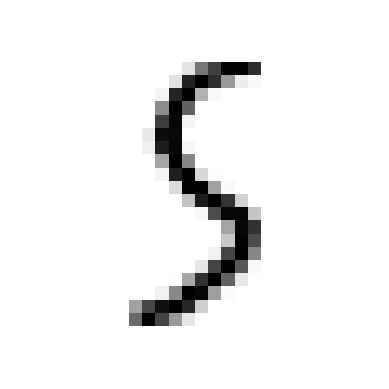

In [68]:
import matplotlib.pyplot as plt

plt.imshow(rand_image, cmap='binary', interpolation='nearest')
plt.axis('off')
print(data['label'][rand_int]) # prints the random_integer

In [69]:
X_train = data.drop(columns=['label'])
y_train = data['label']

In [72]:
# train an sgd_classifier model
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)

In [73]:
cvs_accuracy = cross_val_score(sgd_clf, X_train, y_train, scoring='accuracy', cv=5)

In [74]:
cvs_accuracy

array([0.88309524, 0.85892857, 0.8827381 , 0.86464286, 0.87964286])

In [75]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=4)

In [78]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)

In [79]:
cm

array([[3939,    0,   13,   14,   12,   16,   78,    2,   46,   12],
       [   2, 4543,   31,   14,    6,   10,   21,    7,   44,    6],
       [  21,   48, 3532,  130,   61,   10,  163,   45,  148,   19],
       [  22,   28,  149, 3732,   12,   83,   61,   32,  153,   79],
       [  14,   26,   24,    8, 3545,    2,  100,   15,  111,  227],
       [  70,   33,   45,  296,  136, 2542,  225,   23,  337,   88],
       [  25,    4,   22,    5,   17,   27, 4009,    1,   27,    0],
       [  21,   22,   74,   31,   73,    6,    5, 3752,   41,  376],
       [  27,  109,   65,  170,   47,   52,   77,   17, 3386,  113],
       [  24,   26,   12,   62,  337,   16,    6,  142,  166, 3397]])

In [88]:
from sklearn.metrics import f1_score, precision_score, recall_score

precision = precision_score(y_train, y_train_pred, average='weighted')
recall = recall_score(y_train, y_train_pred, average='weighted')
f1 = f1_score(y_train, y_train_pred, average='weighted')

In [89]:
print(f"precision : {precision}, recall : {recall}, f1 : {f1}")

precision : 0.8695411901164057, recall : 0.8661190476190476, f1 : 0.8651405566085109


In [91]:
decision_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=4, method='decision_function')

In [110]:
decision_scores.shape

(42000, 10)

In [124]:
print(decision_scores)

[[ -45842.31283889   19776.61763267  -11188.76853079 ...  -69157.89847177
    -1796.83928077  -23493.96923984]
 [  46887.91248674 -189649.25227804  -23817.78927183 ...  -53057.47547685
   -19751.56390928  -23711.86285231]
 [ -93961.89996988   16347.86042969  -11653.30344755 ...  -11961.17683395
    -6466.78736574  -11470.07175636]
 ...
 [-105646.64997528 -184811.96473389  -64853.24302821 ...   15298.85294373
   -24904.29337025  -11712.17588982]
 [-104968.4415862   -70029.08551019  -21213.24832352 ...  -43821.45145407
   -46678.60261562  -60586.09263367]
 [ -94005.14489801  -30836.22789105  -10080.5321458  ...  -10244.01019595
     2846.53711679   11785.31077192]]


In [99]:
# from sklearn.metrics import roc_auc_score, roc_curve
# fpr, tpr, 
# roc_auc = roc_auc_score(y_train, decision_scores, average='weighted',multi_class= 'ovr')

In [108]:
import joblib
joblib.dump(sgd_clf, "sgd_clf_acc_86")

['sgd_clf_acc_86']

[[3939    0   13   14   12   16   78    2   46   12]
 [   2 4543   31   14    6   10   21    7   44    6]
 [  21   48 3532  130   61   10  163   45  148   19]
 [  22   28  149 3732   12   83   61   32  153   79]
 [  14   26   24    8 3545    2  100   15  111  227]
 [  70   33   45  296  136 2542  225   23  337   88]
 [  25    4   22    5   17   27 4009    1   27    0]
 [  21   22   74   31   73    6    5 3752   41  376]
 [  27  109   65  170   47   52   77   17 3386  113]
 [  24   26   12   62  337   16    6  142  166 3397]]


(-0.5, 9.5, 9.5, -0.5)

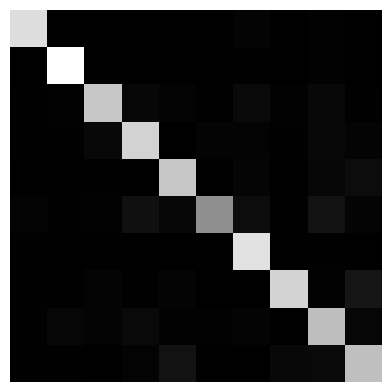

In [114]:
print(cm)
plt.matshow(cm, cmap=plt.cm.gray)
plt.axis('off')

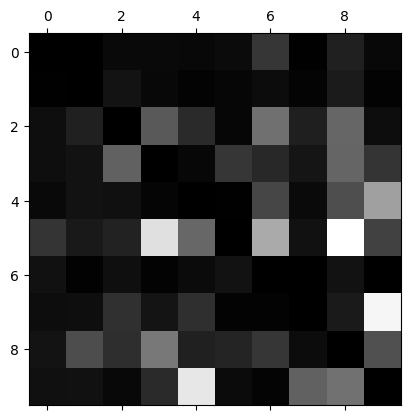

In [118]:
# checking out the errors
row_sums = cm.sum(axis=1, keepdims=True)
norm_cm = cm/row_sums

np.fill_diagonal(norm_cm, 0)
plt.matshow(norm_cm, cmap=plt.cm.gray)
# plt.axis('off')

# print(cm == norm_cm)

In [121]:
n_classes = 10

In [122]:
y_train

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [137]:
decision_scores

array([[ -45842.31283889,   19776.61763267,  -11188.76853079, ...,
         -69157.89847177,   -1796.83928077,  -23493.96923984],
       [  46887.91248674, -189649.25227804,  -23817.78927183, ...,
         -53057.47547685,  -19751.56390928,  -23711.86285231],
       [ -93961.89996988,   16347.86042969,  -11653.30344755, ...,
         -11961.17683395,   -6466.78736574,  -11470.07175636],
       ...,
       [-105646.64997528, -184811.96473389,  -64853.24302821, ...,
          15298.85294373,  -24904.29337025,  -11712.17588982],
       [-104968.4415862 ,  -70029.08551019,  -21213.24832352, ...,
         -43821.45145407,  -46678.60261562,  -60586.09263367],
       [ -94005.14489801,  -30836.22789105,  -10080.5321458 , ...,
         -10244.01019595,    2846.53711679,   11785.31077192]])

In [147]:
# Hyper-parameter Tuning
from sklearn.model_selection import RandomizedSearchCV


param_dist = {
    'loss': ['hinge', 'log', 'squared_hinge'],
    'alpha': np.logspace(-5, 5, 11),  # Regularization parameter (log scale)
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'eta0': np.logspace(-5, 0, 6),  # Learning rate for 'constant' and 'invscaling'
}


random_search = RandomizedSearchCV(sgd_clf, param_distributions=param_dist, n_iter=50, cv=5, verbose=1, random_state=42, n_jobs=-1)


In [ ]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skle

In [132]:
# from sklearn.metrics import precision_recall_curve
# # Initialize a figure to plot
# plt.figure(figsize=(10, 8))

# # Loop over each class
# for i in range(n_classes):
#     precision, recall, thresholds = precision_recall_curve(y_train, decision_scores[i])
    
#     # Plot precision-recall curve for each class
#     plt.plot(thresholds, precision[:-1], label=f'Class {i} Precision')
#     plt.plot(thresholds, recall[:-1], label=f'Class {i} Recall')

# # Set labels and title
# plt.xlabel('Thresholds')
# plt.ylabel('Precision / Recall')
# plt.title('Precision-Recall vs Thresholds for Multi-Class Classification')
# plt.legend(loc='best')
# plt.grid(True)
# plt.show()


In [133]:
# from sklearn.metrics import precision_recall_curve

# # for class_ in range(n_classes):
# # y_scores = cross_val_predict(sgd_clf, X_train, y_train[class_])
# precisions, recalls, thresholds = precision_recall_curve(y_train, decision_scores)

## Using random_forest 